# The Question
### What are people talking about when the talk about Liberals and Conservative while using #teaparty?
#### A lesson in Linear Regression
- For example, are does the rate of the word "liberal" rise with the word "idiot"?
- Is the word "conservative" have any relationship with the words "values" or "principles"?

In [1]:
library(ggplot2)

### Read in the Data

In [2]:
data <- read.csv('data/word_rates.csv')

In [3]:
data

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,X,Year,Month,Day,no_tot,datetime,no_stupid,no_obama,no_liberal,no_idiot,no_conservative,no_values,no_principles,stupid_rate,obama_rate,liberal_rate,idiot_rate,conservative_rate,values_rate,principles_rate
1,0,2014,8,5,5819,2014-08-05,17,383,53,23,268,2,2,0.00292146416910122,0.0658188692215157,0.00910809417425675,0.00395256916996047,0.0460560233717134,0.000343701666953085,0.000343701666953085
2,1,2014,8,6,13722,2014-08-06,30,638,77,29,290,9,12,0.00218627022299956,0.0464946800757907,0.00561142690569888,0.00211339454889958,0.0211339454889958,0.000655881066899869,0.000874508089199825
3,2,2014,8,7,10057,2014-08-07,24,770,69,21,188,1,3,0.00238639753405588,0.0765635875509595,0.00686089291041066,0.0020880978422989,0.0186934473501044,9.94332305856617e-05,0.000298299691756985
4,3,2014,8,8,9876,2014-08-08,45,414,81,38,211,9,4,0.00455650060753341,0.0419198055893074,0.00820170109356015,0.00384771162413933,0.0213649250708789,0.000911300121506683,0.000405022276225192
5,4,2014,8,9,7163,2014-08-09,21,421,66,34,139,2,2,0.00293173251430965,0.0587742565963982,0.0092140164735446,0.00474661454697752,0.0194052771185258,0.000279212620410443,0.000279212620410443
6,5,2014,8,10,6632,2014-08-10,13,408,50,15,178,36,1,0.00196019300361882,0.0615199034981906,0.00753920386007238,0.00226176115802171,0.0268395657418577,0.00542822677925211,0.000150784077201448
7,6,2014,8,11,8693,2014-08-11,26,418,49,19,240,6,1,0.00299091222822961,0.048084665823076,0.0056367191993558,0.00218566662832164,0.0276084205682733,0.000690210514206833,0.000115035085701139
8,7,2014,8,12,8567,2014-08-12,22,355,59,15,159,10,3,0.00256799346328937,0.041438076339442,0.00688689156063966,0.00175090463406093,0.0185595891210459,0.00116726975604062,0.000350180926812186
9,8,2014,8,13,9300,2014-08-13,19,273,160,12,147,1,5,0.00204301075268817,0.0293548387096774,0.0172043010752688,0.00129032258064516,0.0158064516129032,0.00010752688172043,0.000537634408602151
10,9,2014,8,14,15388,2014-08-14,35,673,108,33,445,6,15,0.00227449961008578,0.0437353782167923,0.00701845593969327,0.00214452820379516,0.0289186378996621,0.000389914218871848,0.00097478554717962


## Some Summary Stats

In [55]:
print("summary of liberals (pure count)")
summary(data$no_liberal)
print("summary of conservatives (pure count)")
summary(data$no_conservative)
print("summary of idiot rate")
summary(data$idiot_rate)

[1] "summary of liberals (pure count)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.25   47.00   73.86   69.75 1936.00 

[1] "summary of conservatives (pure count)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   43.0    89.0   121.0   147.4   170.2   855.0 

[1] "summary of idiot rate"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.087e-05 1.298e-03 2.043e-03 2.663e-03 3.012e-03 3.115e-02 

## Below are the models attempting to predict the label Liberal

In [87]:
l_model1<-lm(liberal_rate~idiot_rate, data = data) # pvalue = 0.766
l_model2<-lm(liberal_rate~obama_rate, data = data) # pvalue = 0.0627 .
l_model3<-lm(liberal_rate~values_rate, data = data) # pvalue = 0.316
l_model4<-lm(liberal_rate~principles_rate, data = data) # pvalue = 0.614 
l_model5<-lm(liberal_rate~stupid_rate, data = data) # pvalue = 0.604
l_model6<-lm(liberal_rate~conservative_rate, data = data) # pvalue = 0.525

In [89]:
c_model1<-lm(conservative_rate~idiot_rate, data = data) # pvalue = 0.267
c_model2<-lm(conservative_rate~obama_rate, data = data) # pvalue = 0.383
c_model3<-lm(conservative_rate~values_rate, data = data) # pvalue = 0.0505 .
c_model4<-lm(conservative_rate~principles_rate, data = data) # pvalue = 6.24e-11 ***
c_model5<-lm(conservative_rate~stupid_rate, data = data) # pvalue = 0.8437
c_model6<-lm(conservative_rate~liberal_rate, data = data) # pvalue = 0.5247

In [90]:
# cycle through the summary outputs by switching the models out
summary(c_model5)


Call:
lm(formula = conservative_rate ~ stupid_rate, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023396 -0.008006 -0.002494  0.004218  0.099818 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.023956   0.001016  23.584   <2e-16 ***
stupid_rate -0.025386   0.128638  -0.197    0.844    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0142 on 256 degrees of freedom
Multiple R-squared:  0.0001521,	Adjusted R-squared:  -0.003754 
F-statistic: 0.03894 on 1 and 256 DF,  p-value: 0.8437


### Plots 
I only want to plot those with significant effects. See the models above.

In [77]:
lib_obama <- ggplot(data = data, aes(x = obama_rate,y = liberal_rate)) + geom_point() + stat_smooth(method = "lm") + ggtitle("Liberal Rate ~ Obama Rate")
cons_val <- ggplot(data = data, aes(x = values_rate,y = conservative_rate)) + geom_point() + stat_smooth(method = "lm") + ggtitle("Conservative Rate ~ Values Rate")
cons_princ <- ggplot(data = data, aes(x = principles_rate,y = conservative_rate)) + geom_point() + stat_smooth(method = "lm") + ggtitle("Conservative Rate ~ Priciples Rate")

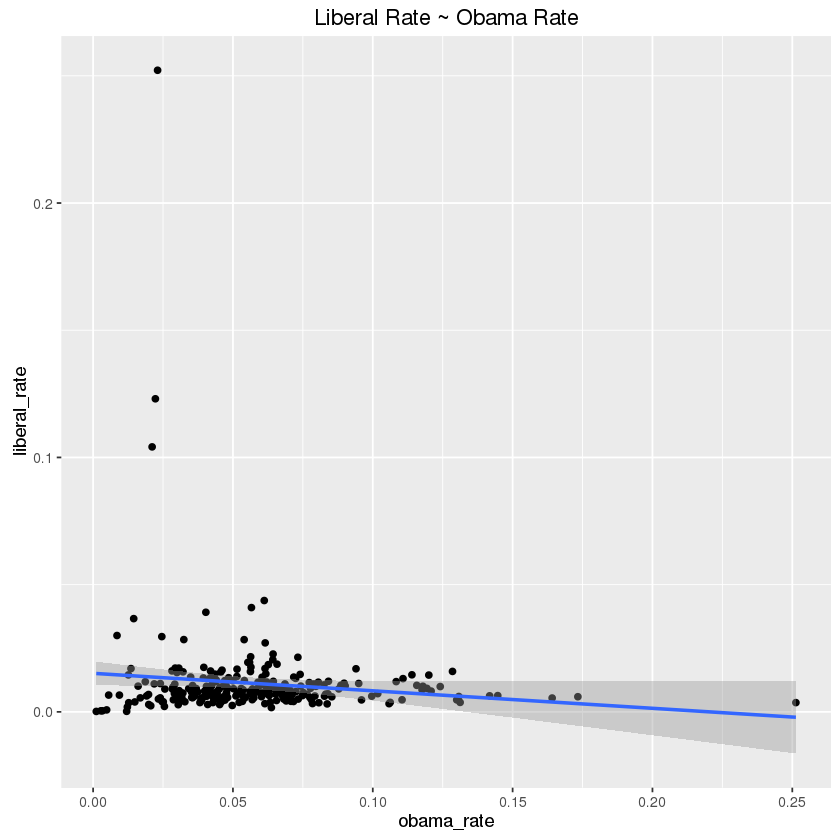

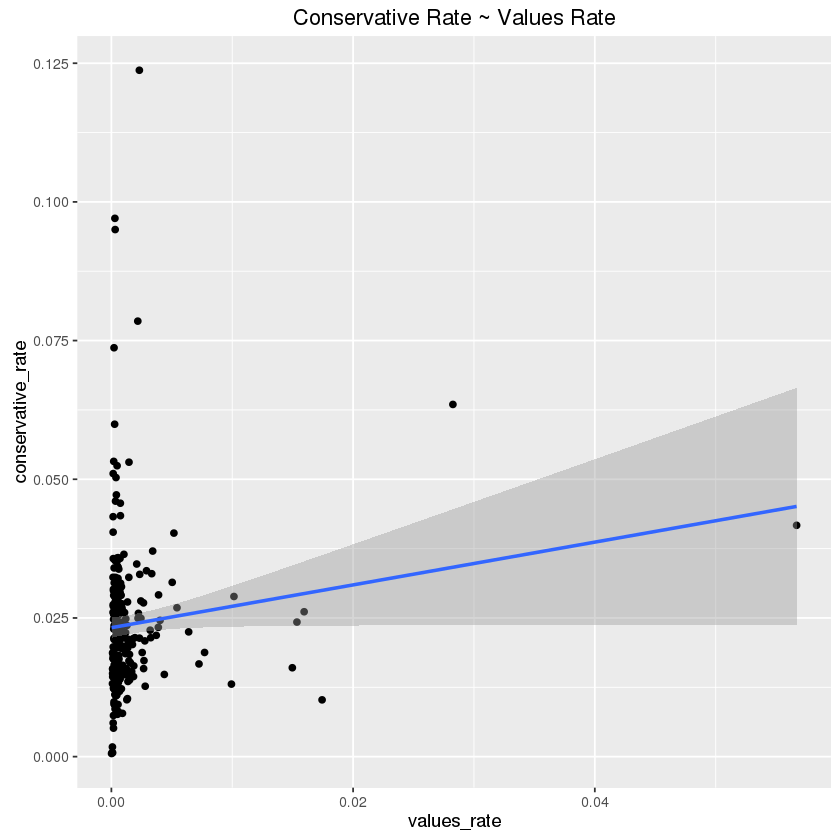

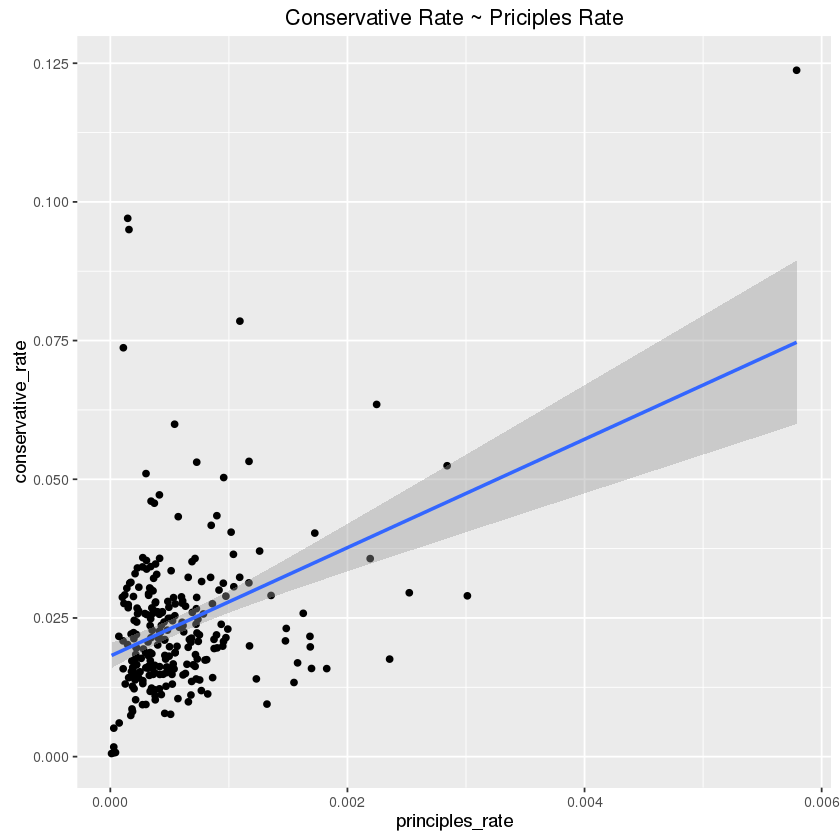

In [83]:
lib_obama
cons_val
cons_princ

In [85]:
# save the plots to the charts folder
ggsave(file = 'charts/lib_obama.png',plot = lib_obama)
ggsave(file = 'charts/cons_val.png',plot = cons_val)
ggsave(file = 'charts/cons_princ.png',plot = cons_princ)

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
